In [4]:
import numpy as np # Linear Algebra
import matplotlib.pyplot as plt # Plotting
from matplotlib.patches import Rectangle # for visualizing the robot

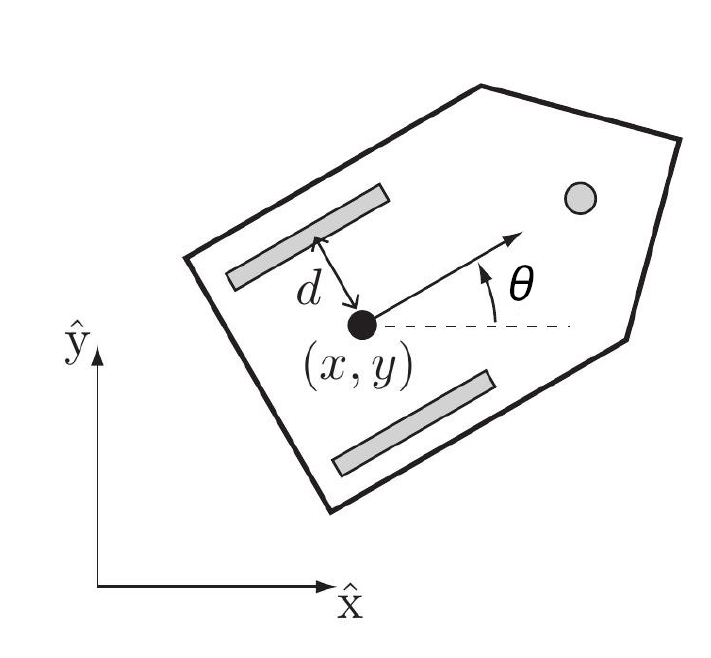

In [5]:
# distance of wheels
d = 0.25

# radii
wheel_radius = 0.1

In [6]:
def diff_drive_kinematics(theta, d, wheel_radius):
    c = np.cos(theta)
    s = np.sin(theta)
    return np.array([[-wheel_radius / (2. * d), wheel_radius / (2. * d)], [c * wheel_radius / 2., c * wheel_radius / 2.], [s * wheel_radius / 2., s * wheel_radius / 2.]])

In [7]:
# Let's first do a "random" simulation
p = np.zeros((3, 1)) # position and theta of the base (θ, x, y)

# timestep
dt = 0.1

all_poses = [p]
for _ in range(1000): # while we haven't reached the target
    u = np.array([[0.5, 0.1]]).T # wheel commands that do a circle!!
    # Forward simulation using the kinematics + Euler integration
    H = diff_drive_kinematics(p[0, 0], d, wheel_radius) # get kinematics
    v = H @ u
    p = p + v * dt
    # Just for visuals
    all_poses += [p]

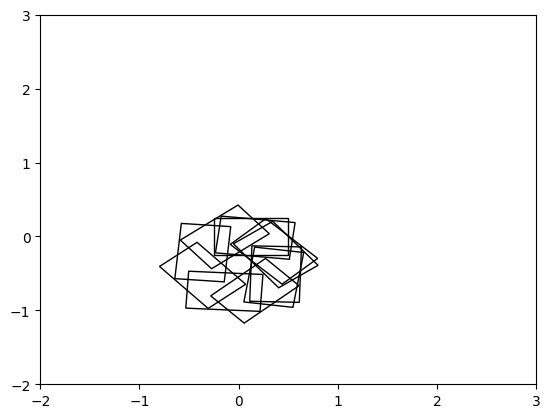

In [8]:
# Plot the trajectory
fig = plt.figure()
ax = fig.add_subplot(111)

def rot(theta):
    return np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

for p in all_poses[::100]:
    # compute positions
    bpb = np.array([[-d, -d]]).T
    bpw = rot(p[0, 0]) @ bpb + p[1:, :]

    rect = Rectangle((bpw[0, 0], bpw[1, 0]), 3*d, 2*d, edgecolor = 'black', fill=False, angle=p[0, 0] * 180. / np.pi)
    # add rectangle to plot
    ax.add_patch(rect)

# Set the limits for the environment
plt.xlim(-2, 3);
plt.ylim(-2, 3);

In [9]:
# Let's do a small simulation
p = np.zeros((3, 1)) # position and theta of the base (θ, x, y)

# target pose
target_p = np.array([[np.pi / 2., 1., -2.]]).T

# timestep
dt = 0.1

# error threshold
angle_thres = 0.01

all_poses = [p]
while np.linalg.norm(target_p - p) > 1e-2: # while we haven't reached the target
    angle_diff = target_p[0, 0] - p[0, 0]
    pos_diff = target_p[1:, :] - p[1:, :]

    dist = np.linalg.norm(pos_diff)
    steer_direction = np.arctan2(pos_diff[1, 0], pos_diff[0, 0]) - p[0, 0]
    u = np.array([[0., 0.]]).T
    if dist > 1e-6 or np.abs(angle_diff) < angle_thres:
        if steer_direction > angle_thres:
            u[0, 0] = -0.5
            u[1, 0] = 0.5
        elif steer_direction < -angle_thres:
            u[0, 0] = 0.5
            u[1, 0] = -0.5
        else:
            u[0, 0] = u[1, 0] = min(1., 0.5 * dist)
    else:
        if angle_diff > angle_thres:
            u[0, 0] = -0.5
            u[1, 0] = 0.5
        elif angle_diff < -angle_thres:
            u[0, 0] = 0.5
            u[1, 0] = -0.5

    # Forward simulation using the kinematics + Euler integration
    H = diff_drive_kinematics(p[0, 0], d, wheel_radius) # get kinematics
    v = H @ u
    p = p + v * dt
    # Just for visuals
    all_poses += [p]
pend = np.copy(p)

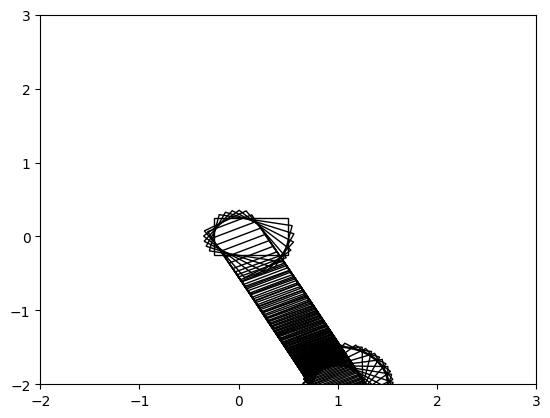

In [10]:
# Plot the trajectory
fig = plt.figure()
ax = fig.add_subplot(111)

def rot(theta):
    return np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

for p in all_poses[::10]:
    # compute positions
    bpb = np.array([[-d, -d]]).T
    bpw = rot(p[0, 0]) @ bpb + p[1:, :]

    rect = Rectangle((bpw[0, 0], bpw[1, 0]), 3*d, 2*d, edgecolor = 'black', fill=False, angle=p[0, 0] * 180. / np.pi)
    # add rectangle to plot
    ax.add_patch(rect)

# Set the limits for the environment
plt.xlim(-2, 3);
plt.ylim(-2, 3);